First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

C:\Users\jrahu\AppData\Local\Temp\ipykernel_24728\2797762954.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\jrahu\AppData\Local\Temp\ipykernel_24728\2797762954.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


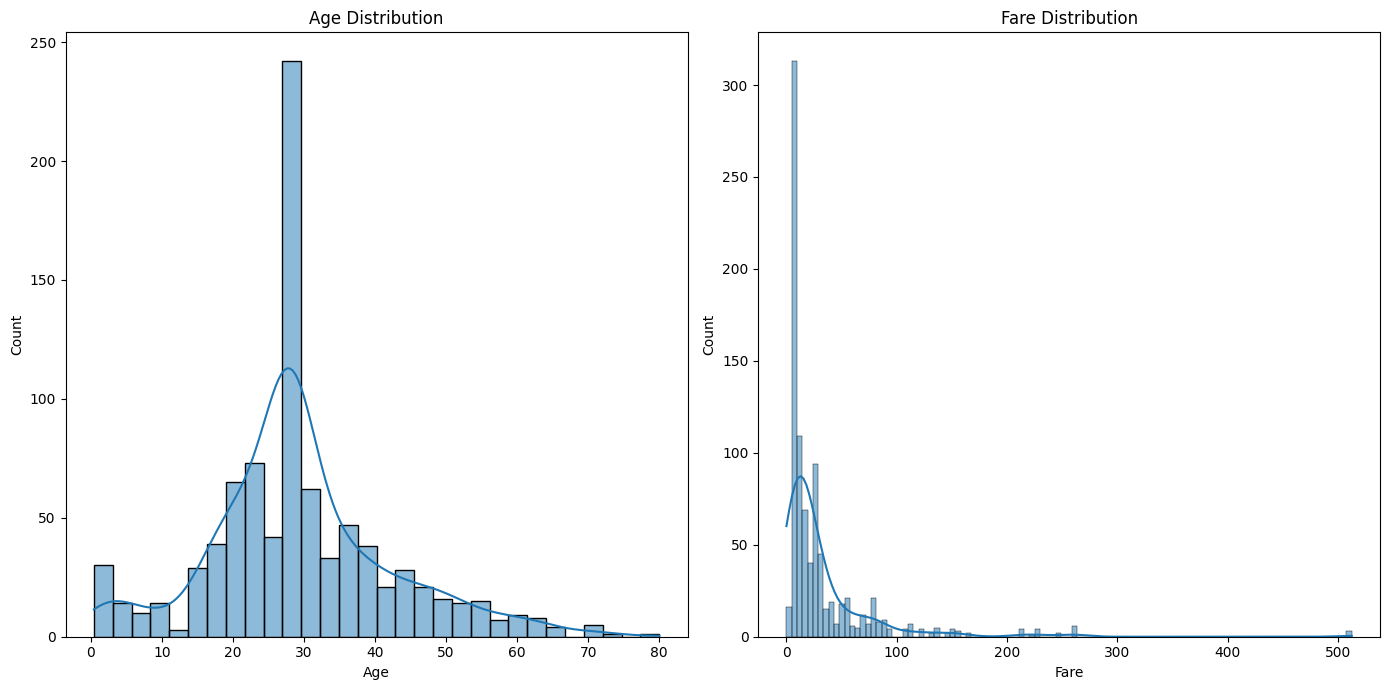

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

print("First few rows of the dataset:")
print(data.head())

print("\nMissing values in each column:")
print(data.isnull().sum())

data['Age'].fillna(data['Age'].median(), inplace=True)

data.drop('Cabin', axis=1, inplace=True)

data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

print("\nDescriptive statistics of the dataset:")
print(data.describe(include='all'))

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data['Fare'], kde=True)
plt.title('Fare Distribution')

plt.tight_layout()
plt.show()

corr = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(7, 5))
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Sex')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()
plt.figure(figsize=(7, 5))
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Pclass')
plt.show()

plt.figure(figsize=(7, 5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data, palette='coolwarm')
plt.title('Age vs Fare by Survival')
plt.show()
